# week 7: statistical inference 

dr. tomomi parins-fukuchi



### what is inference?



### what is inference?

- **statistical inference:** making a proposition about some properties of a population



### what is inference?

- **statistical inference:** making a proposition about some properties of a population

- this can help us make generalizations to learn how the world works


### what is inference?


- **statistical inference:** making a proposition about some properties of a population

- this can help us make generalizations to learn how the world works

- this process involves both **data** and a **model**



### models and data 

- so far in this course, we have learned about several important models


### models and data 

- so far in this course, we have learned about several important models

- today, we will learn how to apply them to learn about nature from data 


### statistical paradigms

- frequentism
- bayesian
- "likelihoodist"

### frequentism

- all the classics you learned in Stats 101 


### frequentism

- all the classics you learned in Stats 101 
- probability = the proportion of outcomes


### frequentism

- all the classics you learned in Stats 101 
- probability = the proportion of outcomes
    - P(event) = the % of times it happens over many trials


### frequentism

- all the classics you learned in stats 101 
- probability = the proportion of outcomes
    - P(event) = the % of times it happens over many trials
- uncertainty in the properties we infer are the result of statistical sampling


### bayesianism

- what we can learn from data is influenced by our prior beliefs



### bayesianism

- what we can learn from data is influenced by our prior beliefs
- probabilities reflect degree of belief after seeing some data

### bayesianism

- what we can learn from data is influenced by our prior beliefs
- probabilities reflect degree of belief after seeing some data
- uncertainty in the properties we infer reflect differences in degree of belief 

### likelihood function

- a unifying construct across paradigms
- mathematical function specifying the probability of an observation under a model
  - P(data|model)

### likelihood function

- can often use the pdf or pmf of a distribution



### what is the probability that a coin is fair*?

*has an equal chance of being heads or tails when flipped


### Binomial PMF

$$ P(x|p,n) = \binom{n}{x} p^x q^{n-x}$$

p = probability of success in one trial

q = probability of failure in one trial

x = number of times that a specific outcome occurs in n trials

n = number of trials

### Binomial PMF and fair coins

$$ P(x) = \binom{n}{x} p^x q^{n-x}$$

p = probability of **heads** in one trial

q = probability of **tails** in one trial

x = number of times you observe a heads

n = number of flips

### Binomial PMF and fair coins

So if we assume a fair coin...

$$ P(x) = \binom{n}{x} 0.5^x 0.5^{n-x}$$

This expression is equivalent to asking:

$$ P(flips | fair) $$

Or, the probability of observing x heads in n flips, assuming the coin is fair

In [ ]:
from math import factorial

def binom_prob_fair(x, n):
    nchoosex = factorial(n) / ( factorial(x) * factorial(n - x) )
    prob = nchoosex * (0.5 ** float(x)) * (0.5 ** float(n-x))
    return prob

### what is the probability that a coin is fair*?

*has an equal chance of being heads or tails when flipped


### Binomial PMF

$$ P(x) = \binom{n}{x} p^x q^{n-x}$$

p = probability of success in one trial

q = probability of failure in one trial

x = number of times that a specific outcome occurs in n trials

n = number of trials

### Binomial PMF and fair coins

$$ P(x) = \binom{n}{x} p^x q^{n-x}$$

p = probability of **heads** in one trial

q = probability of **tails** in one trial

x = number of times you observe a heads

n = number of flips

### Binomial PMF and fair coins

So if we assume a fair coin...

$$ P(x) = \binom{n}{x} 0.5^x 0.5^{n-x}$$

This expression is equivalent to asking:

$$ P(flips | fair) $$

Or, the probability of observing x heads in n flips, assuming the coin is fair

In [ ]:
# what it the probability of observing 7 heads in 10 flips given that the coin is fair?

import distributions as dist

binom = dist.binomial(n = 10, p = 0.5)
print(binom.pdf(7))

In [ ]:
# what is the probability of observing x heads in 10 flips given that the coin is fair?

import matplotlib.pyplot as plt

binom = dist.binomial(n = 10, p = 0.5)
x = []
probs = []


for i in range(11):
    x.append(i)
    p = binom.pdf(i)
    probs.append(p)
    
plt.plot(x,probs,"o")
plt.xlabel("number of heads")
plt.ylabel("probability")

plt.show()


## likelihood

- let's again say we observe 7 heads in 10 tosses:
    - what is the degree of bias that would best explain this observation?
    - this is called _maximizing the likelihood_

In [ ]:
p_heads = 0.05
binom = dist.binomial(n = 10, p = p_heads)

x = []
l = []

while p_heads < 1.0:
    prob = binom.pdf(7)
    x.append(p_heads)
    l.append(prob)
    p_heads += 0.05
    binom.p = p_heads
    

In [ ]:
plt.plot(x,l,"o")
plt.xlabel("prob. heads")
plt.ylabel("likelihood")
plt.show()

### maximum likelihood

- find the set of parameters that yields highest likelihood for a dataset
- parameters with the highest likelihood called "maximum likelihood estimates" (MLEs)


### maximum likelihood

- model SVL measurements for a population of lizards using a normal distribution
- **what is the value of the mean that maximizes the probability density of the data?**

![h:930 center](images/normal_pdf.svg)


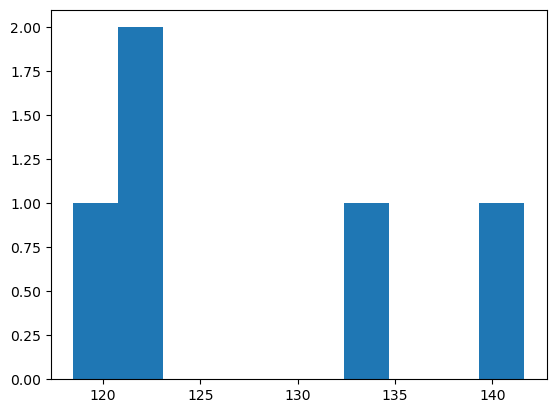

In [1]:
import distributions as dist
import matplotlib.pyplot as plt

svl = dist.normal(130.0,10.0).sample(5)
plt.hist(svl)
plt.show()

## maximum likelihood

likelihood of the svl data:

$$ P(measurements | model, parameters ) $$

or:

$$ P(x | N(\mu,\sigma) ) $$

In [2]:
print(svl)

[121.10272827238033, 118.47713249524966, 133.052475206774, 141.6321298654079, 121.140018445307]


## maximum likelihood

- we will assume each svl measurement is independent and drawn from the same distribution as all others
- likelihood of the full dataset can be calculated as product of the likelihood of each measurement:

$$ P(svl | N(\mu,\sigma) = P(svl_1 | N(\mu,\sigma)) * P(svl_2 | N(\mu,\sigma))...  P(svl_N | N(\mu,\sigma))  $$



In [4]:
.5 * .5 *.5 * .5 * .5

0.03125

## log likelihood

- multiplying each independent likelihood many times can lead to very small numbers:

In [7]:
import math

math.log(.05)

-2.995732273553991

## log-likelihood

- so we typically sum independent **log-likelihood** values instead of multiplying independent likelihoods

$$ \log x * y = \log x + \log y $$

In [10]:
print(math.log(0.05 * 0.05 * 0.05))
print(math.log(0.05) + math.log(0.05) + math.log(0.05))

-8.987196820661973
-8.987196820661973


## likelihood surface

- we usually want to find the value of a parameter that maximizes the (log) likelihood
    - e.g., we may wish to estimate the mean svl length of the population that generated our svl samples
    - what value for the mean parameter provides the strongest explanation for our data?
    - we call this value the **maximum likelihood estimate (MLE)**

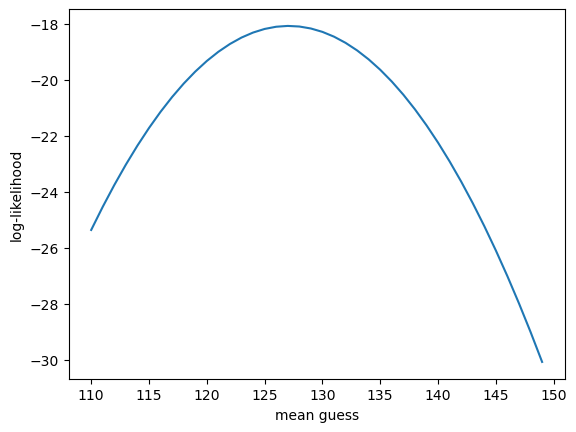

In [12]:
mean = 110.0
norm = dist.normal(mean, 10.0)

x = []
ll = []
for _ in range(40):
    log_like = 0.0
    for i in svl:
        log_like += norm.log_pdf(i)
    x.append(mean)
    ll.append(log_like)
    mean += 1.0
    norm.mean = mean 
    
plt.plot(x,ll)
plt.xlabel("mean guess")
plt.ylabel("log-likelihood")
plt.show()

### maximum likelihood

- MLEs can sometimes be derived analytically for a given model



### maximum likelihood

- For a normal distribution, the result looks familiar:

$$ \hat{\mu} = \frac{\sum_{i=1}^n x_i}{n} $$

$$ \hat{\sigma} =  \sqrt{ \frac{ \sum_{i=1}^n  (x_1 - \hat{\mu} ) }{n}} $$

### maximum likelihood

- analytical derivation of MLEs works for simple models
- complex models may be impossible
- one common solution is **numerical optimization** 

## minimization

- it is convention to seek the minimum of a function rather than the maximum
- we can make our log-likelihood approach fit by **minimizing the _negative_ log-likelihood**

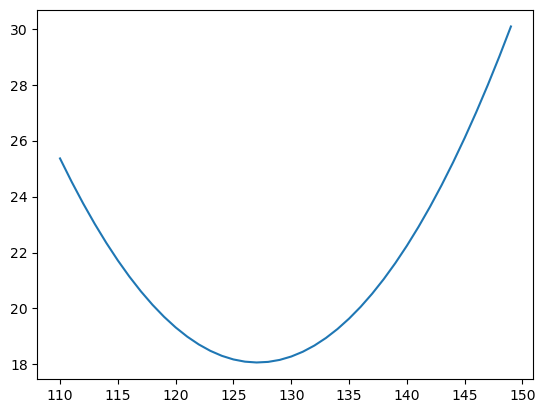

In [13]:
mean = 110.0
norm = dist.normal(mean,10.0)

x = []
ll = []
for _ in range(40):
    log_like = 0.0
    for i in svl:
        log_like += norm.log_pdf(i)
    x.append(mean)
    ll.append(-log_like)
    mean += 1.0
    norm.mean = mean 
    
plt.plot(x,ll)
plt.show()

### numerical optimization


- highly optimized set of rules to "plug and chug" different parameter values
- often involves calculating or approximating the first and/or second derivative of the likelihood function to decide which direction to go
    - e.g., if derivative is negative, move _x_ to the right, if positive, move to the left

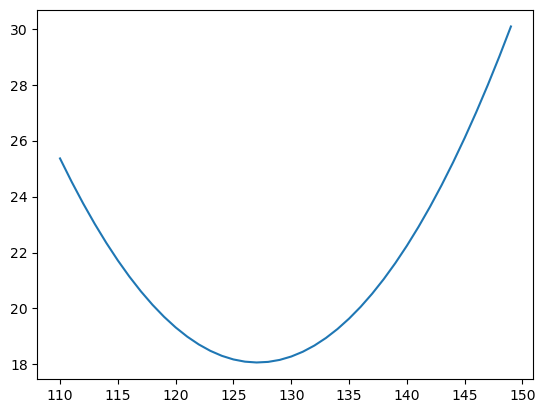

In [14]:
plt.plot(x,ll)
plt.show()

## numerical optimization

many algorithms exist, each requiring different information

![bg right h:700](images/numerical_recipes.jpg)

## numerical optimization


- the `scipy` module implements several numerical optimization routines

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


In [19]:
import math
from scipy import optimize

def norm_neg_ll(mean, sd, x):
    dens = math.log((1.0/(sd*math.sqrt(2.*math.pi))))+((-.5 * (((x - mean)/sd)**2.)))
    return -dens

def evaluate_norm(params, sd, measurements):
    mean = params[0]
    if mean <= 0.0:
        return 10000000
    neg_log_like = 0.0
    for i in measurements:
        neg_log_like += norm_neg_ll(mean, sd, i)
    return neg_log_like

# simulate 5 measurements from normal distribution with mean 130 and sd = 10
svl = dist.normal(130.0,10.0).sample(5)
res = optimize.minimize(evaluate_norm, [100.], args=(10.0, svl), method = "Nelder-Mead")
print(res)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 17.335121694040986
             x: [ 1.353e+02]
           nit: 21
          nfev: 42
 final_simplex: (array([[ 1.353e+02],
                       [ 1.353e+02]]), array([ 1.734e+01,  1.734e+01]))


## numerical optimization

- we can plot the MLE relative to the likelihoods of other values
- we call this the "likelihood surface"

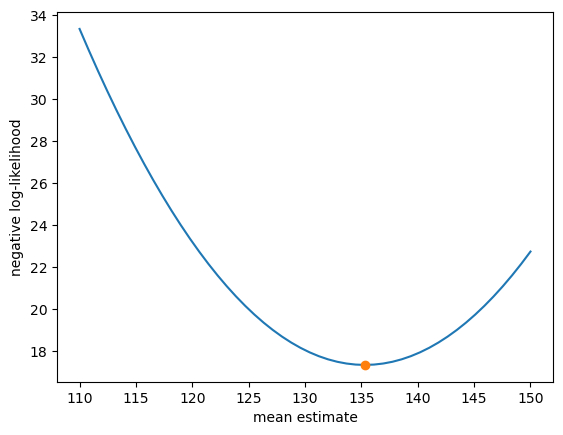

In [21]:
import numpy as np

x = np.linspace(110.,150.,50)
ll = [evaluate_norm([mean], 10.0 ,svl) for mean in x]

plt.plot(x,ll)
plt.plot(res.x[0],res.fun,"o")
plt.xlabel("mean estimate")
plt.ylabel("negative log-likelihood")
plt.show()


## sample size and MLEs

we can se how the size of our dataset impacts our MLEs

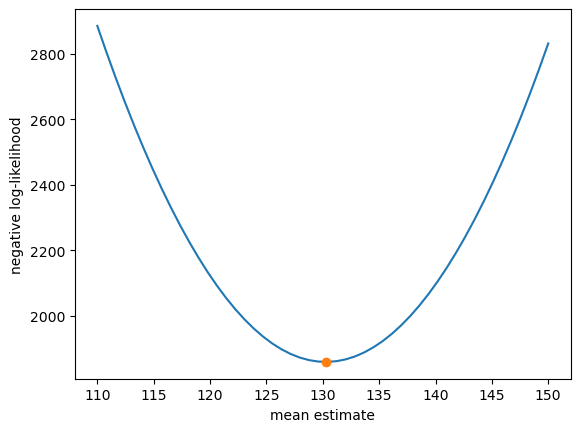

In [49]:
svl = dist.normal(130.0,10.0).sample(500)
res = optimize.minimize(evaluate_norm, [120.], args=(10.0, svl), method = "Nelder-Mead")

x = np.linspace(110.,150.,50)
ll = [evaluate_norm([mean], 10.0 ,svl) for mean in x]

    
plt.plot(x,ll)
plt.plot(res.x[0],res.fun,"o")
plt.xlabel("mean estimate")
plt.ylabel("negative log-likelihood")
plt.show()

## optimizing multiple parameters

- what if our model has multiple unknown parameters?
- this can become a complex problem, because value of one parameter may influence the likelhood of another parameter
- most optimization routines are designed to handle multidimensional problems

In [50]:
def evaluate_norm_2param(params, measurements):
    mean = params[0]
    sd = params[1]
    if mean <= 0.0:
        return 10000000
    neg_log_like = 0.0
    for i in measurements:
        neg_log_like += norm_neg_ll(mean, sd, i)
    return neg_log_like

svl = dist.normal(130.0, 10.0).sample(10) # simulate measurements

res = optimize.minimize(evaluate_norm_2param, [100., 1.0], args=(svl), method = "Nelder-Mead")
print("mean:",res.x[0],"\nsd:",res.x[1])

mean: 128.93622762854363 
sd: 10.149964827643023


In [54]:
X = np.linspace(110, 150, 100)
Y = np.linspace(res.x[1] - (res.x[1] / 2.), res.x[1] + (res.x[1] / 2.), 100)
x, y = np.meshgrid(X, Y)

z = []

for yi in Y: 
    y_ll = []
    for xi in X:
        ll = -evaluate_norm_2param([xi,yi], svl)
        y_ll.append(ll)
        
    z.append(y_ll)



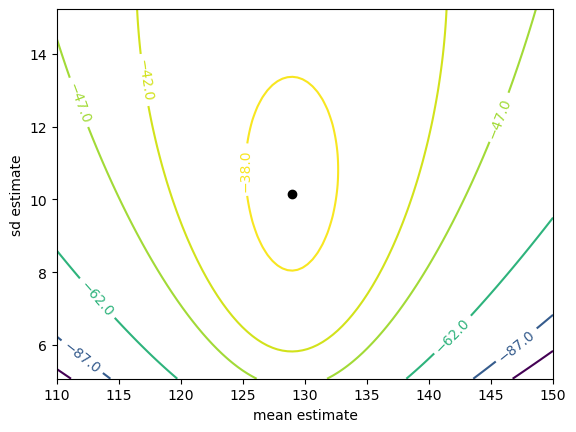

In [56]:
levels = sorted(list(set([-(int(res.fun)+70.),-(int(res.fun)+50.),-(int(res.fun)+25.),-(int(res.fun)+10.), -(int(res.fun)+5.),-(int(res.fun)+1.),-(int(res.fun)+.2)])))
# print(levels)
fig, ax = plt.subplots()
CS = ax.contour(x,y,z,levels=levels)
ax.clabel(CS, inline=True, fontsize=10)
ax.plot(res.x[0],res.x[1],"o",color="black")
plt.xlabel("mean estimate")
plt.ylabel("sd estimate")
plt.show()

## inferring model parameters using maximum likelihood

- use optimization to find parameter values that maximize prob. of observing dataset
- what value of &sigma; maximizes the probability of observing a time series under Brownian motion?

## brownian motion

movement of particle X over time interval t (_dX(t)_) is a normally distributed rv

$$ dX(t) \sim N(0,\sigma\sqrt{t}) $$


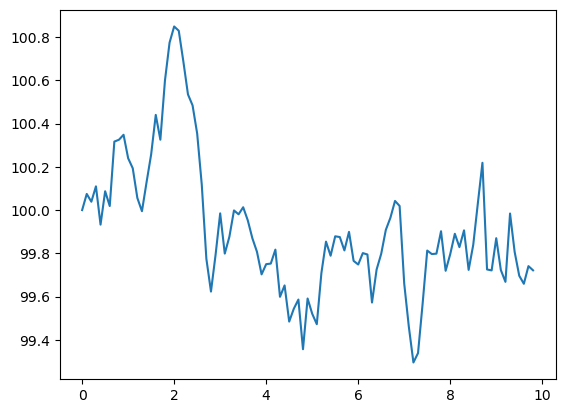

In [57]:
# simulate our data

time_step = 0.1
total_myr = 10.0
n_iter = int(total_myr / time_step)

curtime = 0.0
x = []
y_t = 100.0
y = []

sigma = 0.5  # rate parameter for BM
norm = dist.normal(mean=0.0, sd = sigma)
for i in range(n_iter-1):
    y.append(y_t)
    x.append(curtime)

    delta_y = norm.sample(1)[0] * math.sqrt(time_step)
    y_t += delta_y
    curtime = curtime + time_step
        
plt.plot(x,y)
plt.show()


## maximum likelihood and brownian motion

- we can calculate the likelihood for a particular time series
- optimize &sigma; param using `scipy.minimize`

In [59]:
def brownian_ts_negll(sigma, times, data):
    ll = 0.0
    for i in range(1,len(times)):
        cur_val = data[i]
        last_val = data[i-1]
        delta_y = last_val - cur_val
        delta_t = times[i] - times[i-1]
        sd = math.sqrt(sigma * delta_t)
        stepll = math.log((1.0/(sd*math.sqrt(2.*math.pi)))) + ((-.5 * (((delta_y - 0.0)/sd)**2.)))
        ll += stepll
    return -ll

def evaluate_brownian(params,times,data):
    sigma = params[0]
    if sigma <= 0.0:
        return 100000000.
    
    nll = brownian_ts_negll(sigma,times,data)
    return nll
        

res = optimize.minimize(evaluate_brownian, [1.], args=(x, y), method = "Powell")
rate_mle = res.x[0]
print("sigma MLE:",rate_mle)

sigma MLE: 0.22051842689636741


## maximum likelihood and brownian motion

we can plot the likelihood surface


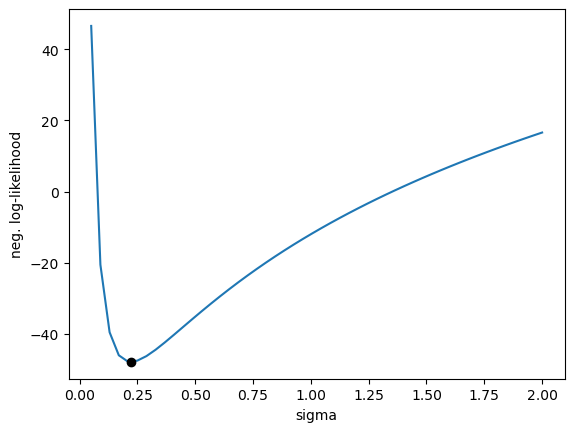

In [61]:
rates = np.linspace(0.05,2.,50)
surf = [evaluate_brownian([rate], x, y) for rate in rates]

plt.plot(rates,surf)
plt.plot(rate_mle,res.fun,"o",color="black")
plt.xlabel("sigma")
plt.ylabel("neg. log-likelihood")
plt.show()

## maximum likelihood and brownian motion

- we can also optimize multiple parameters at a time
- this is useful for more complex models

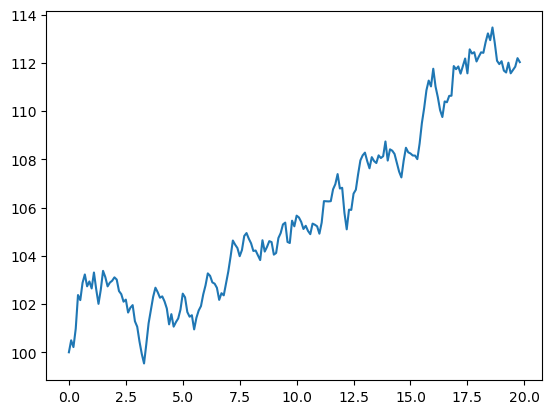

In [63]:
# generate data for Brownian model with positive trend

time_step = 0.1
total_myr = 20.0
n_iter = int(total_myr / time_step)

curtime = 0.0
times = []
y_t = 100.0
pheno = []

trend = 2.8
sigma = 1.5
norm = dist.normal(mean=0.0, sd = sigma)
for i in range(n_iter-1):
    pheno.append(y_t)
    times.append(curtime)

    delta_y = (norm.sample(1)[0] + (trend * time_step)) * math.sqrt(time_step)
    y_t += delta_y
    curtime = curtime + time_step
        
plt.plot(times,pheno)
plt.show()


In [64]:
def trend_ts_negll(trend, sigma, times, data):
    ll = 0.0
    norm = dist.normal(trend,1.0)

    for i in range(1,len(times)):
        cur_val = data[i]
        last_val = data[i-1]
        delta_y = cur_val - last_val
        delta_t = times[i] - times[i-1]
        mean = trend * delta_t
        sd = math.sqrt(sigma * delta_t)
        stepll = math.log((1.0/(sd*math.sqrt(2.*math.pi)))) + ((-.5 * (((delta_y - mean) / sd ) ** 2.)))
        ll += stepll
    return -ll

def evaluate_trend(params,times,data):
    trend = params[0]
    sigma = params[1]
    if sigma <= 0.0:
        return 100000000.
    
    nll = trend_ts_negll(trend,sigma,times,data)
    return nll


    
res = optimize.minimize(evaluate_trend, [0.0, 1.0], args=(times, pheno), method = "BFGS")
trend_mle = res.x[0]
rate_mle = res.x[1]
print("trend MLE:",trend_mle,"\nsigma MLE:",rate_mle)

trend MLE: 0.6078253777227207 
sigma MLE: 1.9479286549206183


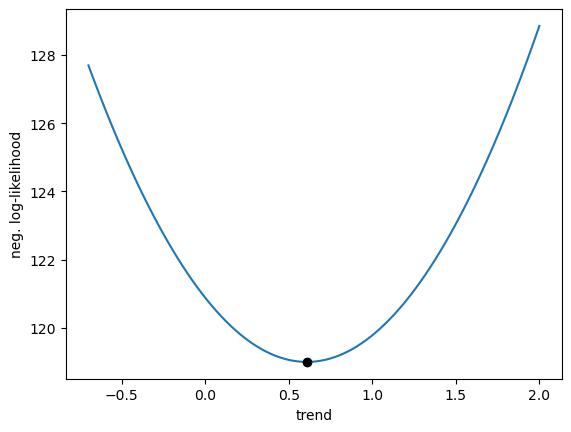

In [65]:
trends = np.linspace(-.7,2.,100)
surf = [evaluate_trend([trend, rate_mle], times, pheno) for trend in trends]


plt.plot(trends,surf)
plt.plot(trend_mle,res.fun,"o",color="black")
plt.xlabel("trend")
plt.ylabel("neg. log-likelihood")
plt.show()

In [66]:
X = np.linspace(res.x[0] - (res.x[0] / 2.), res.x[0] + (res.x[0] / 2.), 100)
Y = np.linspace(res.x[1] - (res.x[1] / 2.), res.x[1] + (res.x[1] / 2.), 100)
Xgrid, Ygrid = np.meshgrid(X, Y)
z = []

for yi in Y: 
    y_ll = []
    for xi in X:
        ll = -evaluate_trend([xi,yi], times, pheno)
        y_ll.append(ll)
        
    z.append(y_ll)


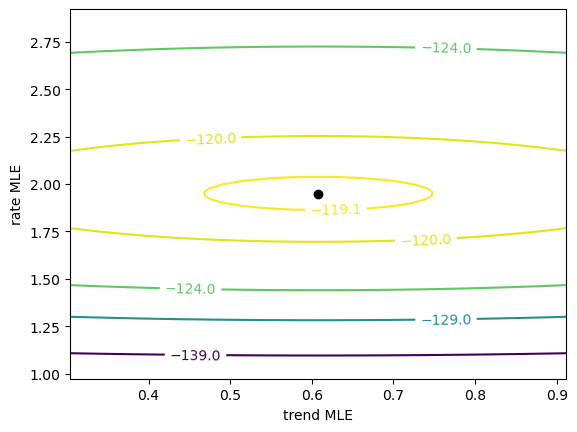

In [67]:
levels = [-res.fun - 20,-res.fun - 10,-res.fun - 5,-res.fun - 1, -res.fun - .1] 
fig, ax = plt.subplots()
CS = ax.contour(Xgrid,Ygrid,z,levels=levels)
ax.clabel(CS, inline=True, fontsize=10)
ax.plot(res.x[0],res.x[1],"o",color="black")
plt.xlabel("trend MLE")
plt.ylabel("rate MLE")
plt.show()